In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import datetime
import psutil
import math
import seaborn as sns
from datetime import timedelta, datetime, tzinfo, timezone, time

In [5]:
def show_data():
    train_folder = [7554,7556,7557,7558]#,7559,7560,7561,7563,7569,7570,7571,7572,7573,7574]
    for j in train_folder:
        for i in range(3,20,8):
            url = r"train/"+str(j)+"/SimpleTest/"+str(i)+".csv"
            data = pd.read_csv(url)
            #print(data.info())


In [55]:
data = pd.read_csv(r'train/7554/SimpleTest/12.csv')

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          529 non-null    object 
 1    Y         527 non-null    float64
 2    Pressure  527 non-null    float64
 3    TiltX     527 non-null    float64
 4    TiltY     527 non-null    float64
 5    Time      527 non-null    object 
dtypes: float64(4), object(2)
memory usage: 24.9+ KB


In [57]:
#remove the extra spaces in the columns.
print(data.columns)
data.columns = data.columns.str.replace(' ', '')
data.head(3)

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')


,X,Y,Pressure,TiltX,TiltY,Time
0,688.818570273704,526.514378,0.071031,-4515.0,2197.0,00:18.1988702
1,688.66058436309,525.724449,0.078355,-4515.0,2197.0,00:18.2144819
2,688.29195057166,523.670632,0.089586,-4515.0,2197.0,00:18.2302213


In [58]:
submit_time = data.iloc[-1][0]
start_time = data.iloc[-2][0]
data.dropna(inplace=True)

print(start_time)
print(submit_time)

Time Elapsed till drawing started: 00:04.9671808
Time Elapsed till drawing submit: 00:28.5419362


In [59]:
data['X'] = data.X.astype(float)

In [60]:
# change the Time column to float
data.Time = data.Time.str.replace("00:","").astype(np.float64)

In [61]:
data.head(3)

,X,Y,Pressure,TiltX,TiltY,Time
0,688.818570,526.514378,0.071031,-4515.0,2197.0,18.198870
1,688.660584,525.724449,0.078355,-4515.0,2197.0,18.214482
2,688.291951,523.670632,0.089586,-4515.0,2197.0,18.230221


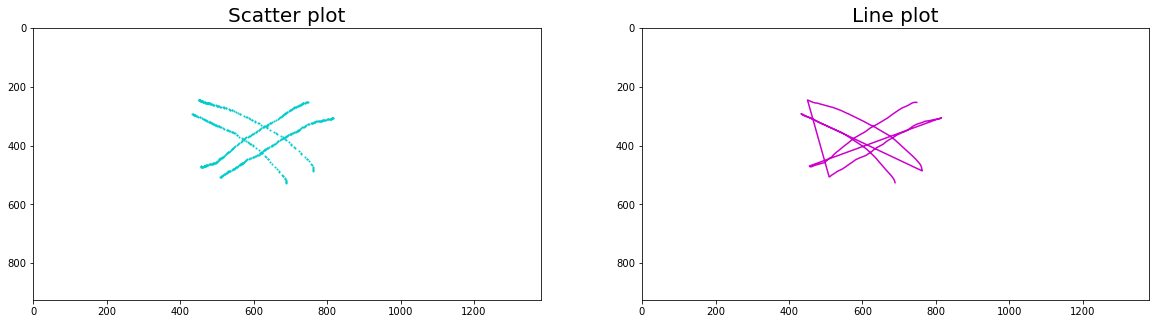

In [62]:
fig=plt.figure(figsize=(20,5))
ax= fig.add_subplot(1, 2, 1)

plt.gca().invert_yaxis()
ax.scatter(data.X,data.Y,s=1,c='#00CCCC')
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
ax.set_title("Scatter plot",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
plt.gca().invert_yaxis()
ax2.plot(data.X,data.Y,"#CC00CC")
ax2.set_xbound(lower=0.0, upper=1381)
ax2.set_ybound(lower=0.0, upper=925)
ax2.set_title("Line plot",fontdict={'fontsize': 20})

plt.show()

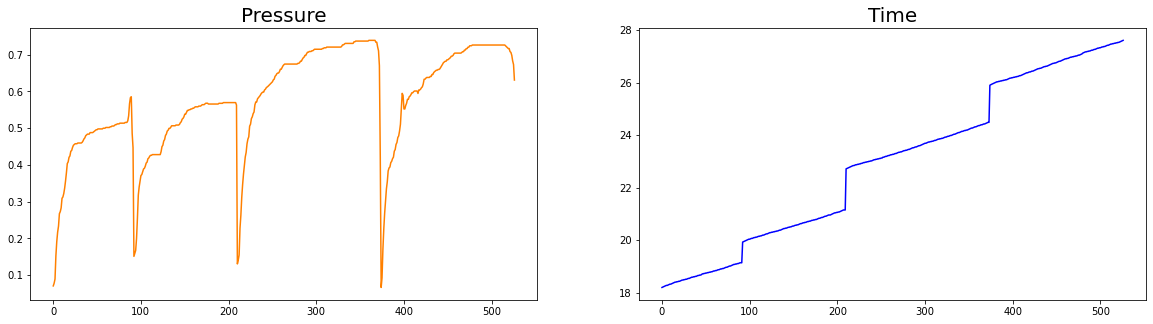

In [63]:
fig=plt.figure(figsize=(20,5))

ax= fig.add_subplot(1, 2, 1)
ax.plot(data.Pressure,"#FF8000")
ax.set_title("Pressure",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(data.Time,c='b')
ax2.set_title("Time",fontdict={'fontsize': 20})

plt.show()

## *Hand lifts:*

In [64]:
hand_lifts = 0
rolling_std = data.Time.rolling(window=20).std()

for i in range(len(data.Time)-1):
    if (data.Time[i+1] > data.Time[i] + rolling_std[i]):
        hand_lifts +=1
        
print("Number of hand lifts: " + str(hand_lifts))

Number of hand lifts: 3


In [79]:
hand_lifts = 0
rolling_std = data.Pressure.rolling(window=50).std()

for i in range(len(data.Time)-1):
    if (data.Pressure[i+1] > data.Pressure[i] + rolling_std[i]):
        hand_lifts +=1
        
print("Number of hand lifts: " + str(hand_lifts))

Number of hand lifts: 3


## *Number of lines:*

In [69]:
distance = []
for x in range(len(data.X)-1):
        distance.append(math.sqrt((data.X[x+1] - data.X[x])**2 + (data.Y[x+1] - data.Y[x])**2))       

In [73]:
print('max distance:',max(distance),'\nmin distance:',min(distance))

max distance: 395.1191161662439 
min distance: 0.0


In [71]:
distance =pd.Series(distance)

In [72]:

numberOfLines=[]
count= 1
for x in range(len(distance)-1):
    if (distance[x+1]> distance[x] + distance.rolling(window=460).std()[x]):
        numberOfLines.append(x)
        count=count+1

print('Number of lines:',count)
print("\n",numberOfLines)

Number of lines: 1

 []


<IPython.core.display.Javascript object>


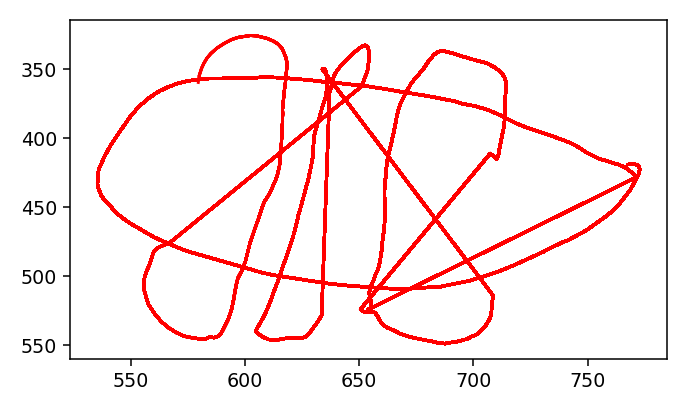

In [122]:
import psutil
%matplotlib notebook

plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure(figsize=(5,3),dpi=100)
ax = fig.add_subplot(111)
plt.gca().invert_yaxis()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
plt.tight_layout()
plt.show()


In [123]:
c=[]
d=[]
for i in range (len(data.X)):
    c.append(data.X[i])
    d.append(data.Y[i])
    plt.tight_layout()
    ax.plot(c,d , color='r')
    fig.canvas.draw() 
plt.close()


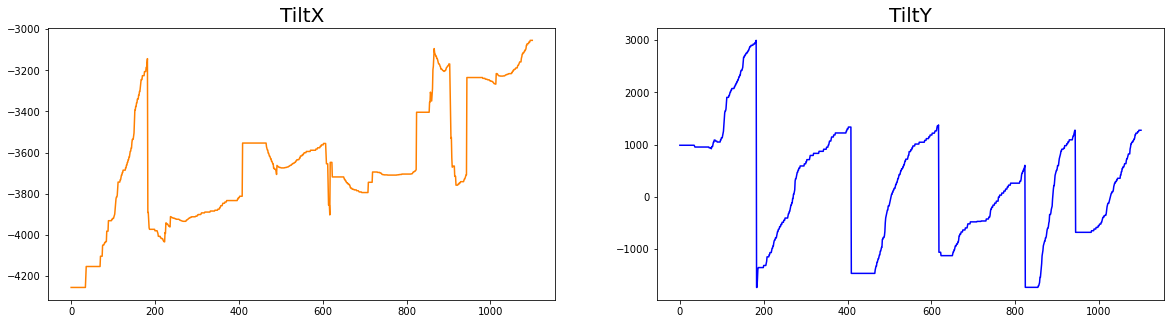

In [421]:
fig=plt.figure(figsize=(20,5))

ax= fig.add_subplot(1, 2, 1)
ax.plot(data.TiltX,"#FF8000")
ax.set_title("TiltX",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(data.TiltY,c='b')
ax2.set_title("TiltY",fontdict={'fontsize': 20})

plt.show()